In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from matplotlib.lines import Line2D
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from datetime import datetime
%matplotlib inline
rcParams['figure.figsize'] = 17,5
vTicker = 'KEGN'

Text(0.5, 1.0, '[KEGN - Closing Price Trend')

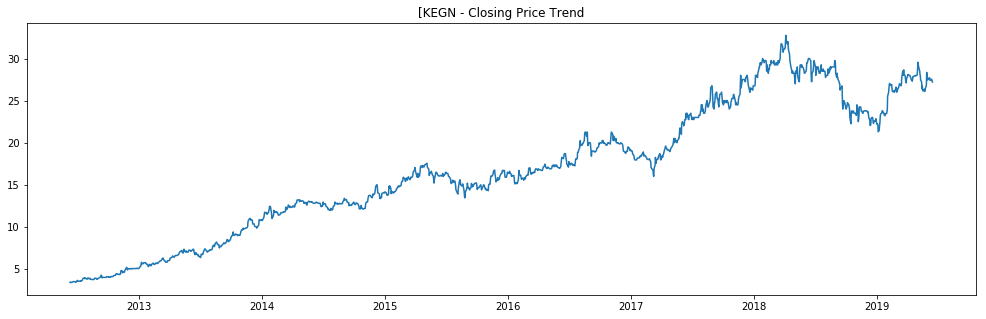

In [4]:
df = pd.read_csv('Safaricom.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.index = df['Date']

plt.plot(df['Close'])
plt.title(f'[{vTicker} - Closing Price Trend')


In [5]:
df_new = df.copy()
toDrop = ['Open', 'High', 'Low', 'Vol.', 'Change %', 'Date']
df_new = df_new.drop(toDrop, axis=1)
df_new.head()

,Close
Date,
2012-06-11,3.40
2012-06-12,3.45
2012-06-13,3.40
2012-06-14,3.40
2012-06-15,3.40


In [6]:
xcount = round(df_new.shape[0]*0.8)
data = df_new.values
train = data[0:xcount,:]
test = data[xcount:,:]
print(f'Dataframe shape: {df_new.shape}, Train data shape: {train.shape}, Test data shape: {test.shape}')

Dataframe shape: (1753, 1), Train data shape: (1402, 1), Test data shape: (351, 1)


In [58]:
scaler = MinMaxScaler(feature_range = (0, 1))
training = scaler.fit_transform(train)

features = []
labels = []

for i in range(60, train.shape[0]):
    features.append(training[i-60: i, 0])
    labels.append(training[i, 0])

features, labels = np.array(features), np.array(labels)
features = np.reshape(features, (features.shape[0], features.shape[1], 1))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(features.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(features, labels, epochs = 50, batch_size = 32)


Epoch 1/50
1342/1342 [==============================] - 6s 5ms/step - loss: 0.0343
Epoch 2/50
1342/1342 [==============================] - 4s 3ms/step - loss: 0.0035
Epoch 3/50
1342/1342 [==============================] - 4s 3ms/step - loss: 0.0034
Epoch 4/50
1342/1342 [==============================] - 4s 3ms/step - loss: 0.0027
Epoch 5/50
1342/1342 [==============================] - 4s 3ms/step - loss: 0.0028
Epoch 6/50
1342/1342 [==============================] - 4s 3ms/step - loss: 0.0026
Epoch 7/50
1342/1342 [==============================] - 4s 3ms/step - loss: 0.0035
Epoch 8/50
1342/1342 [==============================] - 4s 3ms/step - loss: 0.0028
Epoch 9/50
1342/1342 [==============================] - 4s 3ms/step - loss: 0.0024
Epoch 10/50
1342/1342 [==============================] - 4s 3ms/step - loss: 0.0025
Epoch 11/50
1342/1342 [==============================] - 4s 3ms/step - loss: 0.0024
Epoch 12/50
1342/1342 [==============================] - 4s 3ms/step - loss: 0.0027
E

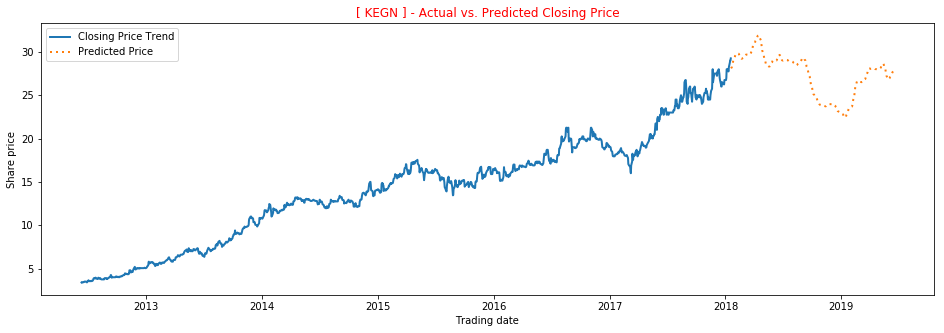

In [59]:
test_inputs = df_new[len(df_new) - len(test) - 60:].values
test_features = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)

test_features = []
for i in range(60, test_inputs.shape[0]):
    test_features.append(test_inputs[i-60: i, 0])

test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

predictions = model.predict(test_features)
predictions = scaler.inverse_transform(predictions)

train_data = df_new[:xcount]
valid_data = df_new[xcount:]

valid_data['Predictions'] = predictions
plt.plot(train_data['Close'], label='Closing Price Trend', lw=2)
plt.plot(valid_data['Predictions'], dashes=[1,2], label='Predicted Price', lw=2)

plt.title(f'[ {vTicker} ] - Actual vs. Predicted Closing Price').set_color('red')
plt.ylabel('Share price')
plt.xlabel('Trading date')

plt.legend()
plt.show()
